# Welcome to explore...we're right in the thick of it 

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from sklearn.cluster import KMeans

import prepare as p
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from scipy.stats import f_oneway
from scipy import stats

In [2]:
df = p.anna_prep()

In [3]:
df.dtypes

crash_date                   datetime64[ns]
crash_id                              int64
crash_latitude                      float64
crash_longitude                     float64
crash_occupant_count                  int64
crash_vehicle_count                   int64
damage_airbag                         int64
damage_burned                         int64
damage_concentrated                   int64
damage_distributed                    int64
damage_rollover                       int64
damage_zone                           int64
dl_cdl                                int64
dl_class_a                            int64
dl_class_b                            int64
dl_class_m                            int64
dl_state                             object
dl_unlicensed                         int64
driver_age                            int64
driver_male                           int64
driver_race                          object
factors_road                         object
factors_spd_lmt_mph             

In [4]:
train, test = train_test_split(df, test_size=0.2, random_state=19, stratify=df.injury_class)

In [5]:
train.shape, test.shape

((14352, 44), (3589, 44))

In [6]:
def split_X_y(train, test, target):
    '''
    Splits train, and test into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 2 dataframes and 2 series:
    X_train (df) & y_train (series), X_test & y_test. 
    '''

        
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return X_train, y_train, X_test, y_test

In [7]:
X_train, y_train, X_test, y_test = split_X_y(train, test, 'injury_class')

In [8]:
X_train

,crash_date,crash_id,crash_latitude,crash_longitude,crash_occupant_count,crash_vehicle_count,damage_airbag,damage_burned,damage_concentrated,damage_distributed,...,vehicle_color,vehicle_id,vehicle_make,vehicle_occupant_count,vehicle_type,vehicle_year,crash_time,crash_hour,crash_day_of_week,accident_contained_injury
6117,2021-04-12 15:57:00,18197524,29.608215,-98.508284,2,2,0,0,0,0,...,silver,3GCR*********0816,chevrolet,1,truck,2010,15:57:00,15,Monday,0
3463,2021-02-27 14:40:00,18126720,29.381912,-98.700943,2,1,0,0,0,0,...,red,1FM5*********6392,ford,2,mpv,2016,14:40:00,14,Saturday,0
794,2021-03-13 03:50:00,18152011,29.544563,-98.410983,2,2,0,0,1,0,...,black,1GKS*********7321,gmc,1,mpv,2015,03:50:00,3,Saturday,0
12646,2021-03-18 16:44:00,18159154,29.572367,-98.234738,4,2,0,0,0,1,...,gray,JTEB*********8464,toyota,3,mpv,2016,16:44:00,16,Thursday,0
12998,2021-03-17 12:21:00,18155591,29.435255,-98.479602,3,2,0,0,0,1,...,silver,WDZP*********6264,mercedes benz,2,bus,2012,12:21:00,12,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5318,2021-02-17 06:21:00,18127307,29.586975,-98.627732,2,2,0,0,0,0,...,gray,1FAF*********7104,ford,1,car,2004,06:21:00,6,Wednesday,0
7478,2021-04-07 14:54:00,18189241,29.367165,-98.516802,3,2,0,0,0,1,...,white,3FA6*********3077,ford,1,car,2019,14:54:00,14,Wednesday,1
15737,2021-05-03 11:45:00,18234414,29.474266,-98.264176,2,2,0,0,0,0,...,white,1HTM*********5339,other,1,non-passenger,2002,11:45:00,11,Monday,0
9503,2021-03-30 11:29:00,18191671,29.495961,-98.325525,2,2,1,0,1,0,...,white,1G1B*********8293,chevrolet,1,car,2018,11:29:00,11,Tuesday,0


In [9]:
def scale_data(train, test, scale_type = None, to_scale = None):
    '''
    returns scaled data of specified type into data frame, will
    '''
    train_copy = train.copy()
    test_copy = test.copy()
    
    if to_scale == None:
        return train_copy, test_copy
    
    else:
        X_train = train_copy[to_scale]
        X_test = test_copy[to_scale]
        
        
        min_max_scaler = MinMaxScaler()
        robust_scaler = RobustScaler()
        standard_scaler = StandardScaler()
        
        min_max_scaler.fit(X_train)
        robust_scaler.fit(X_train)
        standard_scaler.fit(X_train)
    
        mmX_train_scaled = min_max_scaler.transform(X_train)
        rX_train_scaled = robust_scaler.transform(X_train)
        sX_train_scaled = standard_scaler.transform(X_train)
    
    
        mmX_test_scaled = min_max_scaler.transform(X_test)
        rX_test_scaled = robust_scaler.transform(X_test)
        sX_test_scaled = standard_scaler.transform(X_test)
    
    
        mmX_train_scaled = pd.DataFrame(mmX_train_scaled, columns=X_train.columns)
        mmX_test_scaled = pd.DataFrame(mmX_test_scaled, columns=X_test.columns)

        rX_train_scaled = pd.DataFrame(rX_train_scaled, columns=X_train.columns)
        rX_test_scaled = pd.DataFrame(rX_test_scaled, columns=X_test.columns)


        sX_train_scaled = pd.DataFrame(sX_train_scaled, columns=X_train.columns)
        sX_test_scaled = pd.DataFrame(sX_test_scaled, columns=X_test.columns)
    
    
    if scale_type == 'MinMax':
        for i in mmX_train_scaled:
            train_copy[i] = mmX_train_scaled[i].values
            test_copy[i] = mmX_test_scaled[i].values
    elif scale_type == 'Robust':
        for i in rX_train_scaled:
            train_copy[i] = rX_train_scaled[i].values
            test_copy[i] = rX_test_scaled[i].values
    elif scale_type == 'Standard':
          for i in sX_train_scaled:
            train_copy[i] = sX_train_scaled[i].values
            test_copy[i] = sX_test_scaled[i].values
    return train_copy, test_copy
 

In [10]:
train_scaled, test_scaled = scale_data(train, test, scale_type = 'Standard', to_scale = ['crash_longitude','crash_latitude'])

In [11]:
train_scaled

,crash_date,crash_id,crash_latitude,crash_longitude,crash_occupant_count,crash_vehicle_count,damage_airbag,damage_burned,damage_concentrated,damage_distributed,...,vehicle_color,vehicle_id,vehicle_make,vehicle_occupant_count,vehicle_type,vehicle_year,crash_time,crash_hour,crash_day_of_week,accident_contained_injury
6117,2021-04-12 15:57:00,18197524,1.775196,-0.004821,2,2,0,0,0,0,...,silver,3GCR*********0816,chevrolet,1,truck,2010,15:57:00,15,Monday,0
3463,2021-02-27 14:40:00,18126720,-1.086878,-1.812980,2,1,0,0,0,0,...,red,1FM5*********6392,ford,2,mpv,2016,14:40:00,14,Saturday,0
794,2021-03-13 03:50:00,18152011,0.970189,0.908371,2,2,0,0,1,0,...,black,1GKS*********7321,gmc,1,mpv,2015,03:50:00,3,Saturday,0
12646,2021-03-18 16:44:00,18159154,1.321827,2.562488,4,2,0,0,0,1,...,gray,JTEB*********8464,toyota,3,mpv,2016,16:44:00,16,Thursday,0
12998,2021-03-17 12:21:00,18155591,-0.412247,0.264363,3,2,0,0,0,1,...,silver,WDZP*********6264,mercedes benz,2,bus,2012,12:21:00,12,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5318,2021-02-17 06:21:00,18127307,1.506571,-1.125877,2,2,0,0,0,0,...,gray,1FAF*********7104,ford,1,car,2004,06:21:00,6,Wednesday,0
7478,2021-04-07 14:54:00,18189241,-1.273388,-0.084769,3,2,0,0,0,1,...,white,3FA6*********3077,ford,1,car,2019,14:54:00,14,Wednesday,1
15737,2021-05-03 11:45:00,18234414,0.081125,2.286204,2,2,0,0,0,0,...,white,1HTM*********5339,other,1,non-passenger,2002,11:45:00,11,Monday,0
9503,2021-03-30 11:29:00,18191671,0.355513,1.710422,2,2,1,0,1,0,...,white,1G1B*********8293,chevrolet,1,car,2018,11:29:00,11,Tuesday,0


In [12]:
X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled = split_X_y(train_scaled, test_scaled, 'injury_class')

In [13]:
X_train_scaled

,crash_date,crash_id,crash_latitude,crash_longitude,crash_occupant_count,crash_vehicle_count,damage_airbag,damage_burned,damage_concentrated,damage_distributed,...,vehicle_color,vehicle_id,vehicle_make,vehicle_occupant_count,vehicle_type,vehicle_year,crash_time,crash_hour,crash_day_of_week,accident_contained_injury
6117,2021-04-12 15:57:00,18197524,1.775196,-0.004821,2,2,0,0,0,0,...,silver,3GCR*********0816,chevrolet,1,truck,2010,15:57:00,15,Monday,0
3463,2021-02-27 14:40:00,18126720,-1.086878,-1.812980,2,1,0,0,0,0,...,red,1FM5*********6392,ford,2,mpv,2016,14:40:00,14,Saturday,0
794,2021-03-13 03:50:00,18152011,0.970189,0.908371,2,2,0,0,1,0,...,black,1GKS*********7321,gmc,1,mpv,2015,03:50:00,3,Saturday,0
12646,2021-03-18 16:44:00,18159154,1.321827,2.562488,4,2,0,0,0,1,...,gray,JTEB*********8464,toyota,3,mpv,2016,16:44:00,16,Thursday,0
12998,2021-03-17 12:21:00,18155591,-0.412247,0.264363,3,2,0,0,0,1,...,silver,WDZP*********6264,mercedes benz,2,bus,2012,12:21:00,12,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5318,2021-02-17 06:21:00,18127307,1.506571,-1.125877,2,2,0,0,0,0,...,gray,1FAF*********7104,ford,1,car,2004,06:21:00,6,Wednesday,0
7478,2021-04-07 14:54:00,18189241,-1.273388,-0.084769,3,2,0,0,0,1,...,white,3FA6*********3077,ford,1,car,2019,14:54:00,14,Wednesday,1
15737,2021-05-03 11:45:00,18234414,0.081125,2.286204,2,2,0,0,0,0,...,white,1HTM*********5339,other,1,non-passenger,2002,11:45:00,11,Monday,0
9503,2021-03-30 11:29:00,18191671,0.355513,1.710422,2,2,1,0,1,0,...,white,1G1B*********8293,chevrolet,1,car,2018,11:29:00,11,Tuesday,0


### Does Hour of Day Affect Injuries?

$H$0: There is no difference in means for reported injuries by hour

$H$A: There is a difference in means for reported injuries by hour

In [14]:
twelve_am = train[train.crash_hour == 0].injury_class
one_am = train[train.crash_hour == 1].injury_class
two_am = train[train.crash_hour == 2].injury_class
three_am = train[train.crash_hour == 3].injury_class
four_am = train[train.crash_hour == 4].injury_class
five_am = train[train.crash_hour == 5].injury_class

six_am = train[train.crash_hour == 6].injury_class
seven_am = train[train.crash_hour == 7].injury_class
eight_am = train[train.crash_hour == 8].injury_class
nine_am = train[train.crash_hour == 9].injury_class
ten_am = train[train.crash_hour == 10].injury_class
eleven_am = train[train.crash_hour == 11].injury_class

twelve_pm = train[train.crash_hour == 12].injury_class
one_pm = train[train.crash_hour == 13].injury_class
two_pm = train[train.crash_hour == 14].injury_class
three_pm = train[train.crash_hour == 15].injury_class
four_pm = train[train.crash_hour == 16].injury_class
five_pm = train[train.crash_hour == 17].injury_class

six_pm = train[train.crash_hour == 18].injury_class
seven_pm = train[train.crash_hour == 19].injury_class
eight_pm = train[train.crash_hour == 20].injury_class
nine_pm = train[train.crash_hour == 21].injury_class
ten_pm = train[train.crash_hour == 22].injury_class
eleven_pm = train[train.crash_hour == 23].injury_class

In [15]:
f, p = f_oneway(twelve_am,one_am,two_am,three_am, four_am, five_am)
f,p

(1.1776466793920446, 0.31779029263218644)

In [16]:
f, p = f_oneway(six_am,seven_am,eight_am,nine_am, ten_am, eleven_am)
f,p

(1.1108831658474299, 0.35228950618519345)

In [17]:
f, p = f_oneway(twelve_pm,one_pm,two_pm,three_pm, four_pm, five_pm)
f,p

(0.9023615843415576, 0.47838530883249164)

In [18]:
f, p = f_oneway(six_pm,seven_pm,eight_pm,nine_pm, ten_pm, eleven_pm)
f,p

(1.390908114780306, 0.22428493763732993)

In [19]:
f, p = f_oneway(twelve_am,one_am,two_am,three_am, four_am, five_am, six_am,seven_am,eight_am,nine_am, ten_am, eleven_am,
                twelve_pm,one_pm,two_pm,three_pm, four_pm, five_pm, six_pm,seven_pm,eight_pm,nine_pm, ten_pm, eleven_pm)
                
f,p

(1.2069747995646756, 0.22523203179249)

 - since the p value of our anova test is .225 (which is greater than 0.05), we fail to reject the null hypothesis
 - there is not enough evidence to suggest a difference in injuries reported by hour

<br>
<br>

### Does Day of Week Affect Injuries?


$H$0: There is no difference in means for reported injuries by day of the week

$H$A: There is a difference in means for reported injuries by day of the week

In [22]:
monday = train[train.crash_day_of_week == 'Monday'].injury_class
tuesday = train[train.crash_day_of_week == 'Tuesday'].injury_class
wednesday = train[train.crash_day_of_week == 'Wednesday'].injury_class
thursday = train[train.crash_day_of_week == 'Thursday'].injury_class
friday = train[train.crash_day_of_week == 'Friday'].injury_class
saturday = train[train.crash_day_of_week == 'Saturday'].injury_class
sunday= train[train.crash_day_of_week == 'Sunday'].injury_class

In [23]:
f, p = f_oneway(monday, tuesday, wednesday, thursday, friday, saturday, sunday)
f,p

(1.5402019812253784, 0.16054873073006662)

 - since the p value of our anova test is .16 (which is greater than 0.05), we fail to reject the null hypothesis
 - there is not enough evidence to suggest a difference in injuries reported by day of the week

<br>
<br>

In [24]:
train.columns

Index(['crash_date', 'crash_id', 'crash_latitude', 'crash_longitude',
       'crash_occupant_count', 'crash_vehicle_count', 'damage_airbag',
       'damage_burned', 'damage_concentrated', 'damage_distributed',
       'damage_rollover', 'damage_zone', 'dl_cdl', 'dl_class_a', 'dl_class_b',
       'dl_class_m', 'dl_state', 'dl_unlicensed', 'driver_age', 'driver_male',
       'driver_race', 'factors_road', 'factors_spd_lmt_mph', 'factors_weather',
       'fault_class', 'fault_distraction', 'fault_fatigue',
       'fault_intoxication', 'fault_maneuver', 'fault_narrative',
       'fault_speed', 'fault_yield', 'injury_class', 'injury_crash_total',
       'vehicle_color', 'vehicle_id', 'vehicle_make', 'vehicle_occupant_count',
       'vehicle_type', 'vehicle_year', 'crash_time', 'crash_hour',
       'crash_day_of_week', 'accident_contained_injury'],
      dtype='object')

<br>

### Does weather affect whether (haha!) injuries are reported?


$H$0: There is no difference in means for reported injuries for weather types

$H$A: There is a difference in means for reported injuries for weather types

In [28]:
train.factors_weather.value_counts()

clear         10475
cloudy         2762
rain            719
snow            159
other           158
sleet/hail       66
Name: factors_weather, dtype: int64

In [29]:
clear = train[train.factors_weather == 'clear'].injury_class
cloudy = train[train.factors_weather  == 'cloudy'].injury_class
raining = train[train.factors_weather  == 'rain'].injury_class
snowing = train[train.factors_weather  == 'snow'].injury_class
other = train[train.factors_weather  == 'other'].injury_class
sleet_or_hail = train[train.factors_weather  == 'sleet/hail'].injury_class

In [30]:
f, p = f_oneway(clear, cloudy, raining, snowing, other, sleet_or_hail)
f,p

(5.722647946350792, 2.7930538954125068e-05)

 - since the p value of our anova test is 0.00 (which is less than 0.05), we reject the null hypothesis
 - there is evidence to suggest a difference in injuries reported from these weather types for at least one group.

<br>

### Does speed limit affect reported injuries? (gotta go fast, zoom zoom.)


$H$0: There is no difference in means for reported injuries for different speed limits

$H$A: There is a difference in means for reported injuries for different speed limits

In [32]:
train.factors_spd_lmt_mph.value_counts()

 45    3170
 35    2482
 30    2132
 40    2018
 65    1692
 60     868
-1      448
 70     436
 20     401
 50     234
 55     202
 25     161
 15      41
 10      36
 5       24
 75       7
Name: factors_spd_lmt_mph, dtype: int64

In [33]:
unknown = train[train.factors_spd_lmt_mph == -1].injury_class
five_mph = train[train.factors_spd_lmt_mph == 5].injury_class
ten_mph = train[train.factors_spd_lmt_mph == 10].injury_class
fifteen_mph = train[train.factors_spd_lmt_mph == 15].injury_class
twenty_mph = train[train.factors_spd_lmt_mph == 20].injury_class
twentyfive_mph = train[train.factors_spd_lmt_mph == 25].injury_class

thirty_mph = train[train.factors_spd_lmt_mph == 30].injury_class
thirtyfive_mph = train[train.factors_spd_lmt_mph == 35].injury_class
forty_mph = train[train.factors_spd_lmt_mph == 40].injury_class
fortyfive_mph = train[train.factors_spd_lmt_mph == 45].injury_class
fifty_mph = train[train.factors_spd_lmt_mph == 50].injury_class
fiftyfive_mph = train[train.factors_spd_lmt_mph == 55].injury_class

sixty_mph = train[train.factors_spd_lmt_mph == 60].injury_class
sixtyfive_mph = train[train.factors_spd_lmt_mph == 65].injury_class
seventy_mph = train[train.factors_spd_lmt_mph == 70].injury_class
seventyfive_mph = train[train.factors_spd_lmt_mph == 75].injury_class

In [34]:
f, p = f_oneway(unknown, five_mph, ten_mph, fifteen_mph, twenty_mph, twentyfive_mph, thirty_mph, thirtyfive_mph, forty_mph,
               fortyfive_mph, fifty_mph, fiftyfive_mph, sixty_mph, sixtyfive_mph, seventy_mph, seventyfive_mph)
f,p

(6.730950799479758, 9.797683933029763e-15)

 - since the p value of our anova test is 0.00 (which is less than 0.05), we reject the null hypothesis
 - there is evidence to suggest a difference in injuries reported from these weather types for at least one group.

In [36]:
train.groupby('factors_spd_lmt_mph').injury_class.mean()

factors_spd_lmt_mph
-1     0.113839
 5     0.125000
 10    0.027778
 15    0.073171
 20    0.094763
 25    0.074534
 30    0.097561
 35    0.153908
 40    0.184836
 45    0.164669
 50    0.145299
 55    0.123762
 60    0.150922
 65    0.145981
 70    0.142202
 75    0.142857
Name: injury_class, dtype: float64

<br>

### Does speeding do harm over not speeding?


$H$0: There is no difference in means for reported injuries for accidents caused by speeding vs. those not caused by speeding

$H$A: There is a difference in means for reported injuries for accidents caused by speeding vs. those not caused by speeding

In [39]:
speedy = train[train.fault_speed == 1].injury_class
normal = train[train.fault_speed  == 2].injury_class

In [40]:
observed = pd.crosstab(train.fault_speed, train.injury_class, margins = True)
observed

injury_class,0,1,All
fault_speed,,,
0,10647,1780,12427
1,1612,313,1925
All,12259,2093,14352


In [44]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.28568473003307226

- fail to reject the null hypothesis

<br>

### Intoxicated injuries vs. non intoxicated injuries

In [47]:
observed = pd.crosstab(train.fault_intoxication, train.injury_class, margins = True)
observed

chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.26358342286595604

In [65]:
def chi2(feature, target):
    observed = pd.crosstab(feature, target, margins = True)
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p > 0.05:
        return print(f'Fail to reject the null hypothesis, p value is {p}')
    else:
        print(f'Reject the null hypothesis, p value is {p}')

In [67]:
chi2(train.fault_intoxication, train.injury_class)

Fail to reject the null hypothesis, p value is 0.26358342286595604


<br>

### Fatigue injuries vs. non fatigue injuries

In [68]:
chi2(train.fault_fatigue, train.injury_class)

Reject the null hypothesis, p value is 0.006206611057273518


In [70]:
chi2(train.fault_yield, train.injury_class)

Reject the null hypothesis, p value is 0.006206611057273518


In [72]:
chi2(train.fault_maneuver, train.injury_class)

Fail to reject the null hypothesis, p value is 0.9999964603408559


In [74]:
chi2(train.fault_class, train.injury_class)

Reject the null hypothesis, p value is 6.873640587009986e-11


In [75]:
observed = pd.crosstab(train.fault_class, train.injury_class, margins = True)
observed

injury_class,0,1,All
fault_class,,,
0,6192,1238,7430
1,6067,855,6922
All,12259,2093,14352


In [92]:
len(df.sort_index(axis=1).columns)

44

In [93]:
df.sort_index(axis=1).columns

Index(['accident_contained_injury', 'crash_date', 'crash_day_of_week',
       'crash_hour', 'crash_id', 'crash_latitude', 'crash_longitude',
       'crash_occupant_count', 'crash_time', 'crash_vehicle_count',
       'damage_airbag', 'damage_burned', 'damage_concentrated',
       'damage_distributed', 'damage_rollover', 'damage_zone', 'dl_cdl',
       'dl_class_a', 'dl_class_b', 'dl_class_m', 'dl_state', 'dl_unlicensed',
       'driver_age', 'driver_male', 'driver_race', 'factors_road',
       'factors_spd_lmt_mph', 'factors_weather', 'fault_class',
       'fault_distraction', 'fault_fatigue', 'fault_intoxication',
       'fault_maneuver', 'fault_narrative', 'fault_speed', 'fault_yield',
       'injury_class', 'injury_crash_total', 'vehicle_color', 'vehicle_id',
       'vehicle_make', 'vehicle_occupant_count', 'vehicle_type',
       'vehicle_year'],
      dtype='object')

In [94]:
def create_cluster(df, X, k):
    
    """ Takes in df, X (dataframe with variables you want to cluster on) and k
    # It scales the X, calcuates the clusters and return train (with clusters), the Scaled dataframe,
    #the scaler and kmeans object and unscaled centroids as a dataframe"""
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X)
    kmeans.predict(X)
    df['cluster'] = kmeans.predict(X)
    df['cluster'] = 'cluster_' + df.cluster.astype(str)
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    return df, kmeans, centroids

In [95]:
def create_scatter_plot(x,y,df,kmeans, X):
    
    """ Takes in x and y (variable names as strings, along with returned objects from previous
    function create_cluster and creates a plot"""
    
    plt.figure(figsize=(30, 15))
    sns.scatterplot(x = x, y = y, data = df, hue = 'cluster')
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')

Clusters based on longitude and latitude


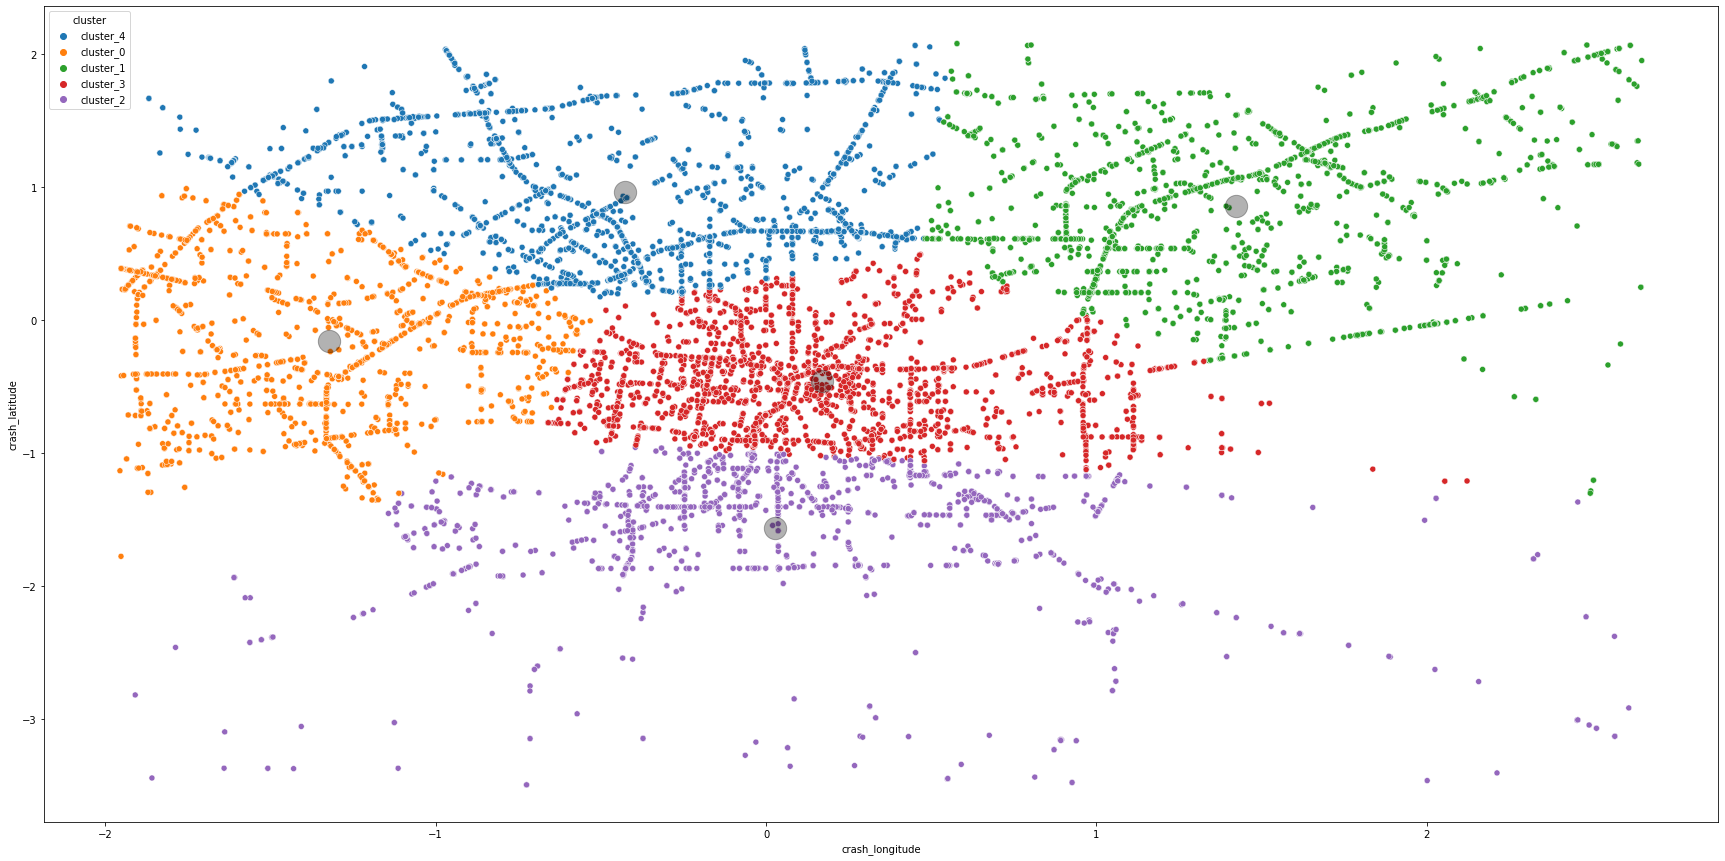

In [114]:
X = train_scaled[['crash_longitude', 'crash_latitude']]
train_scaled, kmeans, centroids = create_cluster(train_scaled, X, 5)
create_scatter_plot('crash_longitude','crash_latitude',train_scaled,kmeans, X)
print('Clusters based on longitude and latitude')

In [115]:
train['cluster'] = kmeans.predict(X)

In [116]:
cluster0 = train[train.cluster == 0].injury_class
cluster1 = train[train.cluster == 1].injury_class
cluster2 = train[train.cluster == 2].injury_class 
cluster3 = train[train.cluster == 3].injury_class 
cluster4 = train[train.cluster == 4].injury_class

In [117]:
f, p = f_oneway(cluster0,cluster1,cluster2,cluster3, cluster4)
f,p

(3.773936899471475, 0.004520414141514086)

In [121]:
df.crash_date.dt.date.unique()

array([datetime.date(2021, 3, 16), datetime.date(2021, 3, 15),
       datetime.date(2021, 3, 14), datetime.date(2021, 3, 13),
       datetime.date(2021, 3, 12), datetime.date(2021, 3, 11),
       datetime.date(2021, 3, 10), datetime.date(2021, 3, 9),
       datetime.date(2021, 3, 8), datetime.date(2021, 3, 7),
       datetime.date(2021, 3, 6), datetime.date(2021, 3, 5),
       datetime.date(2021, 3, 4), datetime.date(2021, 3, 3),
       datetime.date(2021, 3, 2), datetime.date(2021, 3, 1),
       datetime.date(2021, 2, 28), datetime.date(2021, 2, 27),
       datetime.date(2021, 2, 26), datetime.date(2021, 2, 25),
       datetime.date(2021, 2, 24), datetime.date(2021, 2, 23),
       datetime.date(2021, 2, 22), datetime.date(2021, 2, 21),
       datetime.date(2021, 2, 20), datetime.date(2021, 2, 19),
       datetime.date(2021, 2, 18), datetime.date(2021, 2, 17),
       datetime.date(2021, 2, 16), datetime.date(2021, 2, 15),
       datetime.date(2021, 4, 14), datetime.date(2021, 4, 13),
 

Text(0.5, 1.0, 'Features Correlated Casualties in SA Crashes')

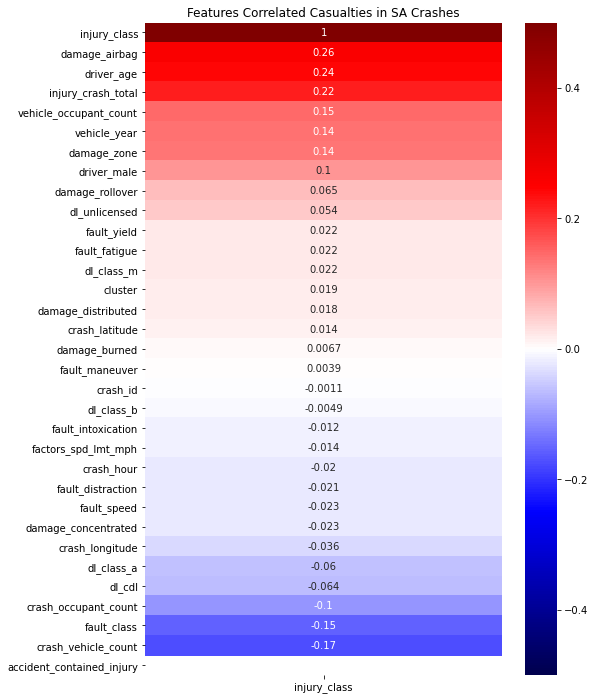

In [123]:
plt.figure(figsize=(8,12))
heatmap = sns.heatmap(train[train.injury_crash_total>0].corr()[['injury_class']].sort_values(by='injury_class', ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='seismic')
heatmap.set_title('Features Correlated Casualties in SA Crashes')

In [124]:
train

,crash_date,crash_id,crash_latitude,crash_longitude,crash_occupant_count,crash_vehicle_count,damage_airbag,damage_burned,damage_concentrated,damage_distributed,...,vehicle_id,vehicle_make,vehicle_occupant_count,vehicle_type,vehicle_year,crash_time,crash_hour,crash_day_of_week,accident_contained_injury,cluster
6117,2021-04-12 15:57:00,18197524,29.608215,-98.508284,2,2,0,0,0,0,...,3GCR*********0816,chevrolet,1,truck,2010,15:57:00,15,Monday,0,4
3463,2021-02-27 14:40:00,18126720,29.381912,-98.700943,2,1,0,0,0,0,...,1FM5*********6392,ford,2,mpv,2016,14:40:00,14,Saturday,0,0
794,2021-03-13 03:50:00,18152011,29.544563,-98.410983,2,2,0,0,1,0,...,1GKS*********7321,gmc,1,mpv,2015,03:50:00,3,Saturday,0,1
12646,2021-03-18 16:44:00,18159154,29.572367,-98.234738,4,2,0,0,0,1,...,JTEB*********8464,toyota,3,mpv,2016,16:44:00,16,Thursday,0,1
12998,2021-03-17 12:21:00,18155591,29.435255,-98.479602,3,2,0,0,0,1,...,WDZP*********6264,mercedes benz,2,bus,2012,12:21:00,12,Wednesday,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5318,2021-02-17 06:21:00,18127307,29.586975,-98.627732,2,2,0,0,0,0,...,1FAF*********7104,ford,1,car,2004,06:21:00,6,Wednesday,0,4
7478,2021-04-07 14:54:00,18189241,29.367165,-98.516802,3,2,0,0,0,1,...,3FA6*********3077,ford,1,car,2019,14:54:00,14,Wednesday,1,2
15737,2021-05-03 11:45:00,18234414,29.474266,-98.264176,2,2,0,0,0,0,...,1HTM*********5339,other,1,non-passenger,2002,11:45:00,11,Monday,0,1
9503,2021-03-30 11:29:00,18191671,29.495961,-98.325525,2,2,1,0,1,0,...,1G1B*********8293,chevrolet,1,car,2018,11:29:00,11,Tuesday,0,1


In [125]:
train["cluster"].replace({0: "West", 1: "Northeast", 2: "South", 3: "Central", 4:"North"}, inplace=True)

In [126]:
train.groupby

,crash_date,crash_id,crash_latitude,crash_longitude,crash_occupant_count,crash_vehicle_count,damage_airbag,damage_burned,damage_concentrated,damage_distributed,...,vehicle_id,vehicle_make,vehicle_occupant_count,vehicle_type,vehicle_year,crash_time,crash_hour,crash_day_of_week,accident_contained_injury,cluster
6117,2021-04-12 15:57:00,18197524,29.608215,-98.508284,2,2,0,0,0,0,...,3GCR*********0816,chevrolet,1,truck,2010,15:57:00,15,Monday,0,North
3463,2021-02-27 14:40:00,18126720,29.381912,-98.700943,2,1,0,0,0,0,...,1FM5*********6392,ford,2,mpv,2016,14:40:00,14,Saturday,0,West
794,2021-03-13 03:50:00,18152011,29.544563,-98.410983,2,2,0,0,1,0,...,1GKS*********7321,gmc,1,mpv,2015,03:50:00,3,Saturday,0,Northeast
12646,2021-03-18 16:44:00,18159154,29.572367,-98.234738,4,2,0,0,0,1,...,JTEB*********8464,toyota,3,mpv,2016,16:44:00,16,Thursday,0,Northeast
12998,2021-03-17 12:21:00,18155591,29.435255,-98.479602,3,2,0,0,0,1,...,WDZP*********6264,mercedes benz,2,bus,2012,12:21:00,12,Wednesday,1,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5318,2021-02-17 06:21:00,18127307,29.586975,-98.627732,2,2,0,0,0,0,...,1FAF*********7104,ford,1,car,2004,06:21:00,6,Wednesday,0,North
7478,2021-04-07 14:54:00,18189241,29.367165,-98.516802,3,2,0,0,0,1,...,3FA6*********3077,ford,1,car,2019,14:54:00,14,Wednesday,1,South
15737,2021-05-03 11:45:00,18234414,29.474266,-98.264176,2,2,0,0,0,0,...,1HTM*********5339,other,1,non-passenger,2002,11:45:00,11,Monday,0,Northeast
9503,2021-03-30 11:29:00,18191671,29.495961,-98.325525,2,2,1,0,1,0,...,1G1B*********8293,chevrolet,1,car,2018,11:29:00,11,Tuesday,0,Northeast


In [128]:
train.columns

Index(['crash_date', 'crash_id', 'crash_latitude', 'crash_longitude',
       'crash_occupant_count', 'crash_vehicle_count', 'damage_airbag',
       'damage_burned', 'damage_concentrated', 'damage_distributed',
       'damage_rollover', 'damage_zone', 'dl_cdl', 'dl_class_a', 'dl_class_b',
       'dl_class_m', 'dl_state', 'dl_unlicensed', 'driver_age', 'driver_male',
       'driver_race', 'factors_road', 'factors_spd_lmt_mph', 'factors_weather',
       'fault_class', 'fault_distraction', 'fault_fatigue',
       'fault_intoxication', 'fault_maneuver', 'fault_narrative',
       'fault_speed', 'fault_yield', 'injury_class', 'injury_crash_total',
       'vehicle_color', 'vehicle_id', 'vehicle_make', 'vehicle_occupant_count',
       'vehicle_type', 'vehicle_year', 'crash_time', 'crash_hour',
       'crash_day_of_week', 'accident_contained_injury', 'cluster'],
      dtype='object')

In [127]:
train.groupby('cluster').injury_class.mean()

cluster
Central      0.137950
North        0.162748
Northeast    0.133333
South        0.156019
West         0.140720
Name: injury_class, dtype: float64

In [139]:
train.groupby(['cluster','fault_class']).injury_class.mean()

cluster    fault_class
Central    0              0.158588
           1              0.116176
North      0              0.193548
           1              0.128356
Northeast  0              0.141667
           1              0.124444
South      0              0.180299
           1              0.129032
West       0              0.158400
           1              0.122649
Name: injury_class, dtype: float64

In [146]:
crash_hour_by_location = train.groupby(['cluster','crash_hour']).injury_class.mean()
print(crash_hour_by_location.to_string())

cluster    crash_hour
Central    0             0.148760
           1             0.093333
           2             0.109589
           3             0.136364
           4             0.125000
           5             0.108108
           6             0.079365
           7             0.150000
           8             0.134228
           9             0.125000
           10            0.184615
           11            0.181287
           12            0.162011
           13            0.141414
           14            0.143590
           15            0.116505
           16            0.128405
           17            0.162939
           18            0.143836
           19            0.132780
           20            0.133333
           21            0.103226
           22            0.092308
           23            0.154412
North      0             0.141176
           1             0.172414
           2             0.112903
           3             0.112903
           4             0

In [151]:
train.groupby(['cluster','crash_hour']).injury_class.mean()

cluster  crash_hour
Central  0             0.148760
         1             0.093333
         2             0.109589
         3             0.136364
         4             0.125000
                         ...   
West     19            0.109195
         20            0.104478
         21            0.152381
         22            0.113043
         23            0.197531
Name: injury_class, Length: 120, dtype: float64

In [155]:
#thanks Robert!
print(train.groupby(['cluster', 'factors_road']).injury_class.value_counts(normalize = True).to_string())

cluster    factors_road           injury_class
Central    center stripe/divider  0               0.809917
                                  1               0.190083
           flashing light         0               0.916667
                                  1               0.083333
           marked lanes           0               0.850806
                                  1               0.149194
           none                   0               0.910808
                                  1               0.089192
           officer                0               0.625000
                                  1               0.375000
           other                  0               0.866667
                                  1               0.133333
           signal light           0               0.825899
                                  1               0.174101
           stop sign              0               0.854839
                                  1               0.145161
         

In [156]:
print(train.groupby(['cluster', 'crash_hour']).injury_class.value_counts(normalize = True).to_string()

cluster    crash_hour  injury_class
Central    0           0               0.851240
                       1               0.148760
           1           0               0.906667
                       1               0.093333
           2           0               0.890411
                       1               0.109589
           3           0               0.863636
                       1               0.136364
           4           0               0.875000
                       1               0.125000
           5           0               0.891892
                       1               0.108108
           6           0               0.920635
                       1               0.079365
           7           0               0.850000
                       1               0.150000
           8           0               0.865772
                       1               0.134228
           9           0               0.875000
                       1               0.125000
    

In [157]:
print(train.groupby(['cluster', 'fault_intoxication']).injury_class.value_counts(normalize = True).to_string())

cluster    fault_intoxication  injury_class
Central    0                   0               0.864336
                               1               0.135664
           1                   0               0.795082
                               1               0.204918
North      0                   0               0.836904
                               1               0.163096
           1                   0               0.847619
                               1               0.152381
Northeast  0                   0               0.868624
                               1               0.131376
           1                   0               0.784615
                               1               0.215385
South      0                   0               0.843615
                               1               0.156385
           1                   0               0.855072
                               1               0.144928
West       0                   0               0.861332
    

In [158]:
print(train.groupby(['fault_intoxication','cluster']).injury_class.value_counts(normalize = True).to_string())

fault_intoxication  cluster    injury_class
0                   Central    0               0.864336
                               1               0.135664
                    North      0               0.836904
                               1               0.163096
                    Northeast  0               0.868624
                               1               0.131376
                    South      0               0.843615
                               1               0.156385
                    West       0               0.861332
                               1               0.138668
1                   Central    0               0.795082
                               1               0.204918
                    North      0               0.847619
                               1               0.152381
                    Northeast  0               0.784615
                               1               0.215385
                    South      0               0.855072
    

In [160]:
print(train.groupby(['factors_spd_lmt_mph','cluster']).injury_class.value_counts(normalize = True).to_string())

factors_spd_lmt_mph  cluster    injury_class
-1                   Central    0               0.924812
                                1               0.075188
                     North      0               0.732558
                                1               0.267442
                     Northeast  0               0.915254
                                1               0.084746
                     South      0               0.918699
                                1               0.081301
                     West       0               0.936170
                                1               0.063830
 5                   Central    0               0.888889
                                1               0.111111
                     Northeast  0               0.600000
                                1               0.400000
                     South      0               1.000000
                     West       0               1.000000
 10                  Central    0          

In [161]:
print(train.groupby(['fault_distraction','cluster']).injury_class.value_counts(normalize = True).to_string())

fault_distraction  cluster    injury_class
0                  Central    0               0.865097
                              1               0.134903
                   North      0               0.833181
                              1               0.166819
                   Northeast  0               0.876999
                              1               0.123001
                   South      0               0.847372
                              1               0.152628
                   West       0               0.849490
                              1               0.150510
1                  Central    0               0.857527
                              1               0.142473
                   North      0               0.845714
                              1               0.154286
                   Northeast  0               0.847492
                              1               0.152508
                   South      0               0.837873
                      

In [163]:
print(train.groupby(['factors_spd_lmt_mph','fault_distraction','cluster']).injury_class.value_counts(normalize = True).to_string())

factors_spd_lmt_mph  fault_distraction  cluster    injury_class
-1                   0                  Central    0               0.927083
                                                   1               0.072917
                                        North      0               0.725806
                                                   1               0.274194
                                        Northeast  0               0.925926
                                                   1               0.074074
                                        South      0               0.915663
                                                   1               0.084337
                                        West       0               0.880000
                                                   1               0.120000
                     1                  Central    0               0.918919
                                                   1               0.081081
                        

In [164]:
print(train.groupby(['factors_spd_lmt_mph','fault_intoxication','cluster']).injury_class.value_counts(normalize = True).to_string())

factors_spd_lmt_mph  fault_intoxication  cluster    injury_class
-1                   0                   Central    0               0.921875
                                                    1               0.078125
                                         North      0               0.726190
                                                    1               0.273810
                                         Northeast  0               0.915254
                                                    1               0.084746
                                         South      0               0.915966
                                                    1               0.084034
                                         West       0               0.933333
                                                    1               0.066667
                     1                   Central    0               1.000000
                                         North      0               1.000000
           

In [166]:
from kmodes.kmodes import KModes